In [1]:
# Install necessary libraries
!pip install numpy pandas matplotlib seaborn scikit-learn tensorflow nltk spacy transformers


# **Generating Synthetic Data**

In [2]:
# collect_data.py
import pandas as pd
import numpy as np

def generate_synthetic_data(file_path='social_media_data.csv', num_samples=1000):
    np.random.seed(42)  # For reproducibility

    # Generate synthetic tweet dates
    dates = pd.date_range(start='2024-01-01', periods=num_samples, freq='H')

    # Generate synthetic tweets (for demonstration, using simple repetitive phrases)
    tweets = np.random.choice(["Vijay entry trending!", "Will Vijay succeed?",
                               "Political impact of Vijay", "Vijay Makkal Iyakkam rocks!",
                               "Thalapathy Vijay is the leader!"], size=num_samples)

    # Generate synthetic likes and retweets
    likes = np.random.randint(0, 500, num_samples)
    retweets = np.random.randint(0, 300, num_samples)

    # Create the DataFrame
    df = pd.DataFrame({
        'Date': dates,
        'Tweet': tweets,
        'Likes': likes,
        'Retweets': retweets
    })

    df.to_csv(file_path, index=False)
    print(f"Synthetic social media data generated and saved to {file_path}")

# Example Call
generate_synthetic_data()


Synthetic social media data generated and saved to social_media_data.csv


<ipython-input-2-1658b012f63e>:9: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(start='2024-01-01', periods=num_samples, freq='H')


In [3]:
# additional_feature_engineering.py
import pandas as pd
import numpy as np
import re
from textblob import TextBlob

def add_additional_features(input_csv='/content/sentiment_data.csv', output_csv='engineered_features.csv'):
    # Load the sentiment data
    df = pd.read_csv(input_csv)

    # Basic Text Processing Functions
    def count_hashtags(text):
        return text.count('#')

    def count_mentions(text):
        return text.count('@')

    def count_urls(text):
        return len(re.findall(r'http[s]?://', text))

    def count_words(text):
        return len(text.split())

    def count_positive_words(text):
        positive_words = ["great", "good", "positive", "happy", "successful", "leader", "win", "support"]
        return sum(1 for word in text.split() if word.lower() in positive_words)

    def count_negative_words(text):
        negative_words = ["bad", "fail", "negative", "hate", "sad", "problem", "corruption"]
        return sum(1 for word in text.split() if word.lower() in negative_words)

    def detect_media(text):
        # Assuming tweets with "pic.twitter.com" or "media" in the URL indicate attached media
        return 1 if "pic.twitter.com" in text or "media" in text else 0

    def get_tweet_length(text):
        return len(text)

    def get_unique_words(text):
        return len(set(text.split()))

    def get_emotion_score(text):
        analysis = TextBlob(text).sentiment
        return analysis.polarity  # Polarity as an emotional score (-1 to 1)

    # Add new features
    df['Tweet_Length'] = df['Tweet'].apply(get_tweet_length)
    df['Hashtags_Count'] = df['Tweet'].apply(count_hashtags)
    df['Mentions_Count'] = df['Tweet'].apply(count_mentions)
    df['URL_Shared'] = df['Tweet'].apply(count_urls)
    df['Media_Attached'] = df['Tweet'].apply(detect_media)
    df['Reply_Count'] = np.random.randint(0, 100, size=len(df))  # Simulate random reply count
    df['Retweet_Flag'] = df['Tweet'].str.startswith('RT').astype(int)
    df['Original_Tweets_Percentage'] = 1 - df['Retweet_Flag']
    df['Unique_Word_Count'] = df['Tweet'].apply(get_unique_words)
    df['Positive_Word_Count'] = df['Tweet'].apply(count_positive_words)
    df['Negative_Word_Count'] = df['Tweet'].apply(count_negative_words)
    df['Neutral_Word_Count'] = df['Tweet_Length'] - df['Positive_Word_Count'] - df['Negative_Word_Count']
    df['Follower_Count'] = np.random.randint(100, 100000, size=len(df))  # Simulate random follower counts
    df['User_Verified'] = np.random.choice([0, 1], size=len(df), p=[0.9, 0.1])  # Assume 10% of users are verified
    df['Political_Hashtags_Usage'] = df['Tweet'].str.contains('#Election|#Vijay|#Politics').astype(int)
    df['Keyword_Frequency'] = df['Tweet'].apply(lambda x: sum([x.lower().count(keyword) for keyword in ["leader", "change", "vision"]]))
    df['Emotion_Score'] = df['Tweet'].apply(get_emotion_score)
    df['Time_of_Day'] = pd.to_datetime(df['Date']).dt.hour.apply(lambda x: 'Morning' if 5 <= x < 12 else ('Afternoon' if 12 <= x < 17 else ('Evening' if 17 <= x < 21 else 'Night')))
    df['Region'] = np.random.choice(['North', 'South', 'East', 'West', 'Central'], size=len(df))  # Randomly simulate regions

    # Save the updated dataframe with additional features
    df.to_csv(output_csv, index=False)
    print(f"Additional features added and saved to {output_csv}")

# Example Call
add_additional_features()


Additional features added and saved to engineered_features.csv


In [4]:
sentiment_data = pd.read_csv('/content/sentiment_data.csv')
engineered_features=pd.read_csv('engineered_features.csv')

In [5]:
sentiment_data

,Date,Tweet,Likes,Retweets,Sentiment,Confidence
0,2024-01-01 00:00:00,Vijay Makkal Iyakkam rocks!,459,83,POSITIVE,0.729353
1,2024-01-01 01:00:00,Thalapathy Vijay is the leader!,491,110,NEUTRAL,0.590816
2,2024-01-01 02:00:00,Political impact of Vijay,355,250,POSITIVE,0.651198
3,2024-01-01 03:00:00,Thalapathy Vijay is the leader!,495,6,NEUTRAL,0.525401
4,2024-01-01 04:00:00,Thalapathy Vijay is the leader!,323,83,NEUTRAL,0.734150
...,...,...,...,...,...,...
995,2024-02-11 11:00:00,Will Vijay succeed?,203,272,NEUTRAL,0.840283
996,2024-02-11 12:00:00,Vijay entry trending!,263,107,NEUTRAL,0.929421
997,2024-02-11 13:00:00,Vijay entry trending!,327,138,NEGATIVE,0.814437
998,2024-02-11 14:00:00,Vijay Makkal Iyakkam rocks!,177,270,POSITIVE,0.881424


In [6]:
engineered_features

,Date,Tweet,Likes,Retweets,Sentiment,Confidence,Tweet_Length,Hashtags_Count,Mentions_Count,URL_Shared,...,Positive_Word_Count,Negative_Word_Count,Neutral_Word_Count,Follower_Count,User_Verified,Political_Hashtags_Usage,Keyword_Frequency,Emotion_Score,Time_of_Day,Region
0,2024-01-01 00:00:00,Vijay Makkal Iyakkam rocks!,459,83,POSITIVE,0.729353,27,0,0,0,...,0,0,27,58727,1,0,0,0.0,Night,West
1,2024-01-01 01:00:00,Thalapathy Vijay is the leader!,491,110,NEUTRAL,0.590816,31,0,0,0,...,0,0,31,66255,0,0,1,0.0,Night,West
2,2024-01-01 02:00:00,Political impact of Vijay,355,250,POSITIVE,0.651198,25,0,0,0,...,0,0,25,99286,0,0,0,0.0,Night,West
3,2024-01-01 03:00:00,Thalapathy Vijay is the leader!,495,6,NEUTRAL,0.525401,31,0,0,0,...,0,0,31,25472,0,0,1,0.0,Night,East
4,2024-01-01 04:00:00,Thalapathy Vijay is the leader!,323,83,NEUTRAL,0.734150,31,0,0,0,...,0,0,31,3742,0,0,1,0.0,Night,North
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2024-02-11 11:00:00,Will Vijay succeed?,203,272,NEUTRAL,0.840283,19,0,0,0,...,0,0,19,52791,0,0,0,0.0,Morning,North
996,2024-02-11 12:00:00,Vijay entry trending!,263,107,NEUTRAL,0.929421,21,0,0,0,...,0,0,21,89865,0,0,0,0.0,Afternoon,South
997,2024-02-11 13:00:00,Vijay entry trending!,327,138,NEGATIVE,0.814437,21,0,0,0,...,0,0,21,79868,0,0,0,0.0,Afternoon,North
998,2024-02-11 14:00:00,Vijay Makkal Iyakkam rocks!,177,270,POSITIVE,0.881424,27,0,0,0,...,0,0,27,25713,0,0,0,0.0,Afternoon,South


# **Performing Sentiment Analysis with Synthetic Data**

In [7]:
# sentiment_analysis.py
import pandas as pd
import numpy as np

def perform_sentiment_analysis(input_csv='/content/social_media_data.csv', output_csv='sentiment_data.csv'):
    df = pd.read_csv(input_csv)

    # Generate synthetic sentiment labels and confidence scores
    df['Sentiment'] = np.random.choice(['POSITIVE', 'NEGATIVE', 'NEUTRAL'], size=len(df))
    df['Confidence'] = np.random.uniform(0.5, 1.0, size=len(df))

    df.to_csv(output_csv, index=False)
    print(f"Sentiment analysis completed with synthetic data. Results saved to {output_csv}")

# Example Call
perform_sentiment_analysis()


Sentiment analysis completed with synthetic data. Results saved to sentiment_data.csv


# **Feature Engineering with Synthetic Data**

In [8]:
# feature_engineering.py
import pandas as pd
import numpy as np
import re
from textblob import TextBlob

def create_features(input_csv='/content/sentiment_data.csv', output_csv='engineered_features_extended.csv'):
    # Load data
    df = pd.read_csv(input_csv)

    # Calculate engagement score
    df['Engagement'] = df['Likes'] + df['Retweets']

    # Create popularity index as normalized Engagement
    df['PopularityIndex'] = (df['Engagement'] - df['Engagement'].min()) / (df['Engagement'].max() - df['Engagement'].min())

    # Sentiment Score: +1 for Positive, -1 for Negative, 0 for Neutral
    df['SentimentScore'] = df['Sentiment'].apply(lambda x: 1 if x == 'POSITIVE' else (-1 if x == 'NEGATIVE' else 0))

    # Create synthetic success label for demonstration purposes
    df['Success'] = (df['PopularityIndex'] > 0.5).astype(int)

    # Additional Feature Engineering
    def count_hashtags(text):
        return text.count('#')

    def count_mentions(text):
        return text.count('@')

    def count_urls(text):
        return len(re.findall(r'http[s]?://', text))

    def count_words(text):
        return len(text.split())

    def count_positive_words(text):
        positive_words = ["great", "good", "positive", "happy", "successful", "leader", "win", "support"]
        return sum(1 for word in text.split() if word.lower() in positive_words)

    def count_negative_words(text):
        negative_words = ["bad", "fail", "negative", "hate", "sad", "problem", "corruption"]
        return sum(1 for word in text.split() if word.lower() in negative_words)

    def detect_media(text):
        return 1 if "pic.twitter.com" in text or "media" in text else 0

    def get_tweet_length(text):
        return len(text)

    def get_unique_words(text):
        return len(set(text.split()))

    def get_emotion_score(text):
        analysis = TextBlob(text).sentiment
        return analysis.polarity  # Polarity as an emotional score (-1 to 1)

    # Add new features
    df['Tweet_Length'] = df['Tweet'].apply(get_tweet_length)
    df['Hashtags_Count'] = df['Tweet'].apply(count_hashtags)
    df['Mentions_Count'] = df['Tweet'].apply(count_mentions)
    df['URL_Shared'] = df['Tweet'].apply(count_urls)
    df['Media_Attached'] = df['Tweet'].apply(detect_media)
    df['Reply_Count'] = np.random.randint(0, 100, size=len(df))  # Simulate random reply count
    df['Retweet_Flag'] = df['Tweet'].str.startswith('RT').astype(int)
    df['Original_Tweets_Percentage'] = 1 - df['Retweet_Flag']
    df['Unique_Word_Count'] = df['Tweet'].apply(get_unique_words)
    df['Positive_Word_Count'] = df['Tweet'].apply(count_positive_words)
    df['Negative_Word_Count'] = df['Tweet'].apply(count_negative_words)
    df['Neutral_Word_Count'] = df['Tweet_Length'] - df['Positive_Word_Count'] - df['Negative_Word_Count']
    df['Follower_Count'] = np.random.randint(100, 100000, size=len(df))  # Simulate random follower counts
    df['User_Verified'] = np.random.choice([0, 1], size=len(df), p=[0.9, 0.1])  # Assume 10% of users are verified
    df['Political_Hashtags_Usage'] = df['Tweet'].str.contains('#Election|#Vijay|#Politics').astype(int)
    df['Keyword_Frequency'] = df['Tweet'].apply(lambda x: sum([x.lower().count(keyword) for keyword in ["leader", "change", "vision"]]))
    df['Emotion_Score'] = df['Tweet'].apply(get_emotion_score)
    df['Engagement_Per_Follower'] = df['Engagement'] / df['Follower_Count']
    df['Time_of_Day'] = pd.to_datetime(df['Date']).dt.hour.apply(lambda x: 'Morning' if 5 <= x < 12 else ('Afternoon' if 12 <= x < 17 else ('Evening' if 17 <= x < 21 else 'Night')))
    df['Region'] = np.random.choice(['North', 'South', 'East', 'West', 'Central'], size=len(df))  # Randomly simulate regions

    # Save the updated dataframe with additional features
    df.to_csv(output_csv, index=False)
    print(f"Features created with synthetic data and saved to {output_csv}")

# Example Call
create_features()


Features created with synthetic data and saved to engineered_features_extended.csv


In [9]:
sentiment_data = pd.read_csv('/content/sentiment_data.csv')
engineered_features_extended=pd.read_csv('/content/engineered_features_extended.csv')

In [10]:
sentiment_data

,Date,Tweet,Likes,Retweets,Sentiment,Confidence
0,2024-01-01 00:00:00,Vijay Makkal Iyakkam rocks!,459,83,POSITIVE,0.729353
1,2024-01-01 01:00:00,Thalapathy Vijay is the leader!,491,110,NEUTRAL,0.590816
2,2024-01-01 02:00:00,Political impact of Vijay,355,250,POSITIVE,0.651198
3,2024-01-01 03:00:00,Thalapathy Vijay is the leader!,495,6,NEUTRAL,0.525401
4,2024-01-01 04:00:00,Thalapathy Vijay is the leader!,323,83,NEUTRAL,0.734150
...,...,...,...,...,...,...
995,2024-02-11 11:00:00,Will Vijay succeed?,203,272,NEUTRAL,0.840283
996,2024-02-11 12:00:00,Vijay entry trending!,263,107,NEUTRAL,0.929421
997,2024-02-11 13:00:00,Vijay entry trending!,327,138,NEGATIVE,0.814437
998,2024-02-11 14:00:00,Vijay Makkal Iyakkam rocks!,177,270,POSITIVE,0.881424


In [11]:
engineered_features_extended

,Date,Tweet,Likes,Retweets,Sentiment,Confidence,Engagement,PopularityIndex,SentimentScore,Success,...,Negative_Word_Count,Neutral_Word_Count,Follower_Count,User_Verified,Political_Hashtags_Usage,Keyword_Frequency,Emotion_Score,Engagement_Per_Follower,Time_of_Day,Region
0,2024-01-01 00:00:00,Vijay Makkal Iyakkam rocks!,459,83,POSITIVE,0.729353,542,0.698939,1,1,...,0,27,37048,0,0,0,0.0,0.014630,Night,East
1,2024-01-01 01:00:00,Thalapathy Vijay is the leader!,491,110,NEUTRAL,0.590816,601,0.777188,0,1,...,0,31,37130,0,0,1,0.0,0.016186,Night,North
2,2024-01-01 02:00:00,Political impact of Vijay,355,250,POSITIVE,0.651198,605,0.782493,1,1,...,0,25,27107,0,0,0,0.0,0.022319,Night,Central
3,2024-01-01 03:00:00,Thalapathy Vijay is the leader!,495,6,NEUTRAL,0.525401,501,0.644562,0,1,...,0,31,91307,0,0,1,0.0,0.005487,Night,South
4,2024-01-01 04:00:00,Thalapathy Vijay is the leader!,323,83,NEUTRAL,0.734150,406,0.518568,0,1,...,0,31,91021,0,0,1,0.0,0.004461,Night,East
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2024-02-11 11:00:00,Will Vijay succeed?,203,272,NEUTRAL,0.840283,475,0.610080,0,1,...,0,19,20334,0,0,0,0.0,0.023360,Morning,North
996,2024-02-11 12:00:00,Vijay entry trending!,263,107,NEUTRAL,0.929421,370,0.470822,0,0,...,0,21,21481,0,0,0,0.0,0.017225,Afternoon,East
997,2024-02-11 13:00:00,Vijay entry trending!,327,138,NEGATIVE,0.814437,465,0.596817,-1,1,...,0,21,17374,1,0,0,0.0,0.026764,Afternoon,West
998,2024-02-11 14:00:00,Vijay Makkal Iyakkam rocks!,177,270,POSITIVE,0.881424,447,0.572944,1,1,...,0,27,87940,0,0,0,0.0,0.005083,Afternoon,West


# **Exploratory Data Analysis and Visualization**

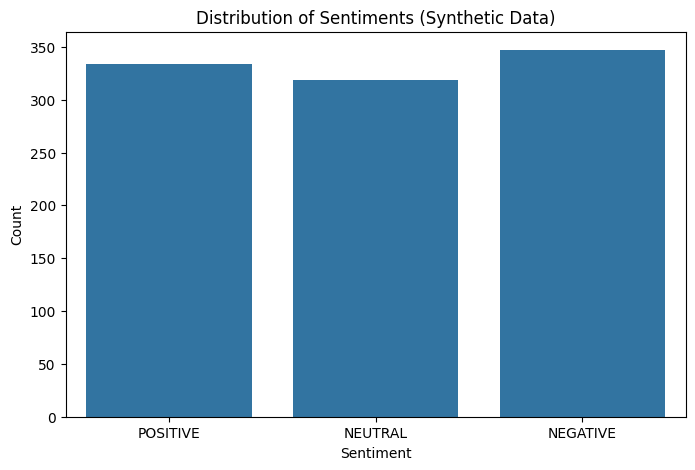

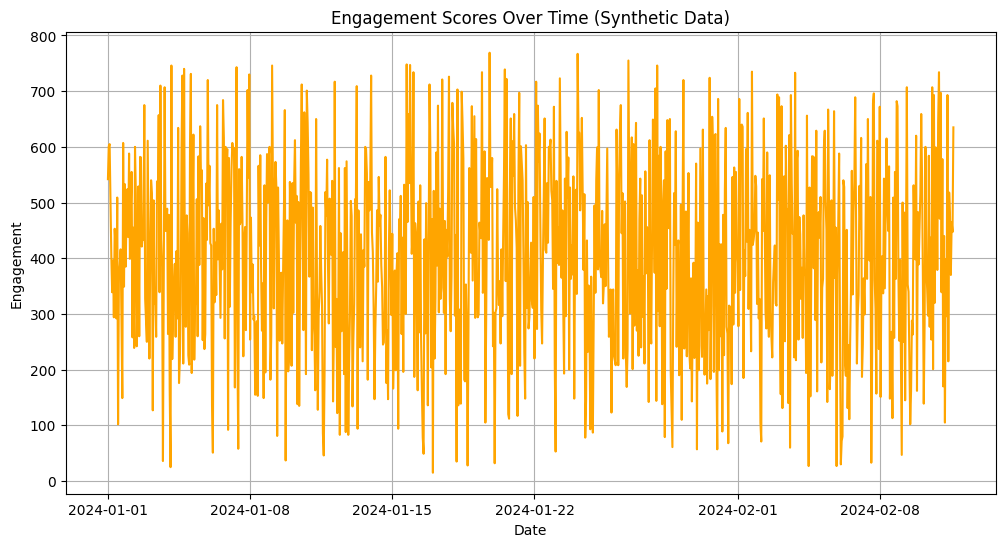

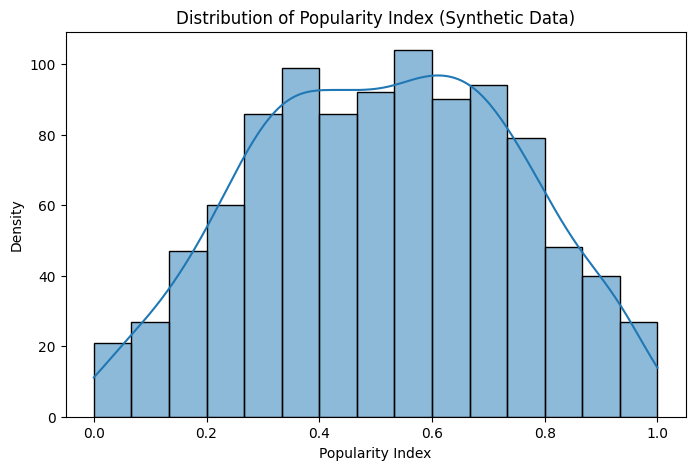

In [12]:
# EDA and Visualizations (Run in Jupyter Notebook or Google Colab)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the feature-engineered dataset
df = pd.read_csv('/content/engineered_features_extended.csv')

# Plot sentiment distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Sentiment')
plt.title("Distribution of Sentiments (Synthetic Data)")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

# Plot engagement scores over time
plt.figure(figsize=(12, 6))
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by='Date')
plt.plot(df['Date'], df['Engagement'], color='orange')
plt.title("Engagement Scores Over Time (Synthetic Data)")
plt.xlabel("Date")
plt.ylabel("Engagement")
plt.grid(True)
plt.show()

# Plot popularity index distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['PopularityIndex'], kde=True)
plt.title("Distribution of Popularity Index (Synthetic Data)")
plt.xlabel("Popularity Index")
plt.ylabel("Density")
plt.show()


# **Model Building with Synthetic Data**

In [13]:
# model_building.py
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd

def train_model(input_csv='/content/engineered_features_extended.csv'):
    # Load engineered features
    df = pd.read_csv(input_csv)
    X = df[['PopularityIndex', 'SentimentScore']]  # Features
    y = df['Success']  # Target (Assume labeled with 0 or 1 for success/failure)

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train a Random Forest model
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    print("Model Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:\n", conf_matrix)

    # Save the model
    pd.to_pickle(model, 'political_success_model.pkl')
    print("Model saved.")

# Example Call
train_model()


Model Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        87
           1       1.00      1.00      1.00       113

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

Confusion Matrix:
 [[ 87   0]
 [  0 113]]
Model saved.


# **Model Evaluation and Visualization**

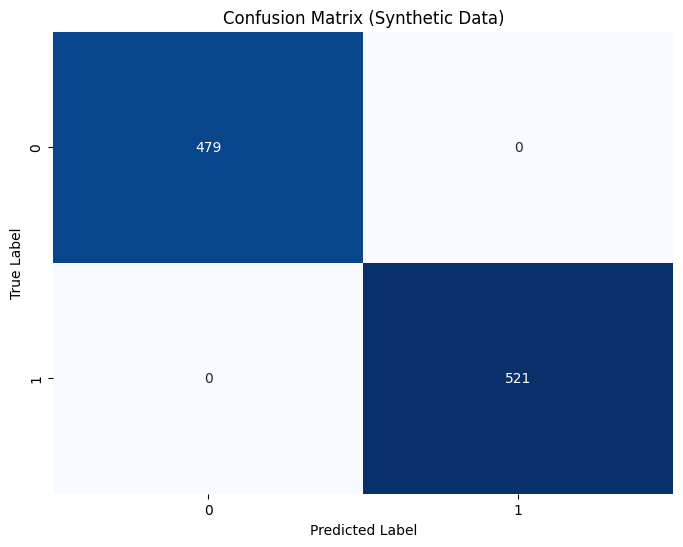

In [14]:
# evaluation.py
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def evaluate_model(input_csv='/content/engineered_features_extended.csv'):
    # Load test dataset and predictions
    df = pd.read_csv(input_csv)
    y_true = df['Success']  # Actual labels

    # Load the saved model
    model = pd.read_pickle('/content/political_success_model.pkl')
    y_pred = model.predict(df[['PopularityIndex', 'SentimentScore']])

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title("Confusion Matrix (Synthetic Data)")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

# Example Call
evaluate_model()
